# Week 7 Practical

## Text encoding

There is a file called "story-cp1252.txt" you will use in this practical. It has the special open-quote and close-quote characters from code page 1252.

Open it up in two different programs that will render it differently, and take a screenshot of each.

Be creative! Suggestions include Windows Notepad and the more command in a CMD prompt window. On OSX, Microsoft Word (if you specify Windows Latin 1 as the encoding) can render the quotes; most other programs won't.

*This cell is where you can put the screenshots*

### Crasher

The following cell will fail with a unicode exception. Fix it.

In [ ]:
# need to specify the encoding
with open('story-cp1252.txt', encoding="cp1252") as f:
    f.read()

### Copying

Make a copy of story-cp1252.txt in **utf-8 format** and then look at it using some other tool on your computer. (e.g.
Windows notepad).

In [ ]:
with open('story-cp1252.txt', encoding="cp1252") as f:
    with open('story-utf8.txt', 'w', encoding='utf-8') as g:
        g.write(f.read())

Make a copy of story-cp1252.txt in **utf-16 format**. Check the size of it in bytes. If you are using Linux or OSX, the UTF-16 file may look like it is corrupted. On Windows it will open normally.

In [ ]:
with open('story-cp1252.txt', encoding="cp1252") as f:
    with open('story-utf16.txt', 'w', encoding='utf-16') as g:
        g.write(f.read())

## Lexico-statistics

You can use any of the NLTK project Gutenberg texts, but this exercise is more fun if you use a file of your own writing. Use an essay, or a set of long emails, a long post you put on social media, or anything else that you have available. It doesn't have to be in English.

- Split the text up into a list of words. The `nltk.word_tokenize` function is useful, but you can also do a `.split(' ')` on a string. (If your document is in a language that isn't English

Then write some code to calculate:

- The total number of words

- The total number of distinct words

- The ratio of the distinct words to total words, which is known as the *lexical diversity* of the writing.

In [ ]:
import nltk
nltk.download('gutenberg')

emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma_words = nltk.word_tokenize(emma)
print(f"The number of words is {len(emma_words)} ")
print(f"Distinct words = {len(set(emma_words))}")
print(f"Lexical diversity = {len(set(emma_words))/len(emma_words)}")


[nltk_data] Downloading package gutenberg to /Users/gregb/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


The number of words is 191776 
Distinct words = 8409
Lexical diversity = 0.04384803103620891


### Zipf's Law

The python `collections.Counter` object is a convenient class: note that it has a `most_common()` method.

Create a `Counter` object; initialise it with the list of words. What are the ten most common words in your document?

In [ ]:
import collections
emma_counter = collections.Counter(emma_words)
print(f"Top ten most fcommon words: {emma_counter.most_common(10)=}")

Top ten most fcommon words: emma_counter.most_common(10)=[(',', 12016), ('.', 6346), ('to', 5125), ('the', 4844), ('and', 4653), ('of', 4272), ('I', 3177), ('--', 3100), ('a', 3001), ("''", 2454)]


Write a function that takes a `Counter` object and then iterates over the distinct words in your document, from most common to least common, keeping track of the rank.

It should then create a log-log plot showing word frequencies vs ranking.

(If you have time, you can also calculate the coefficients, i.e. the slope and intercept of the log-log plot.)

This is the Zipf's law plot we saw in lectures.

In [ ]:
import matplotlib.pyplot
import sklearn.linear_model
import pandas
import math

def zip_plot(counter):
    word_frequencies = []
    for word, count in counter.most_common():
        word_frequencies.append(count)
    ranks = list(range(1, len(word_frequencies) + 1))
    fig, ax = matplotlib.pyplot.subplots()
    ax.loglog(ranks, word_frequencies, marker='.')
    ax.set_xlabel('Rank')
    ax.set_ylabel('Frequency')
    ax.set_title("Zipf's Law")
    ax.grid(True)
    X = pandas.DataFrame({'ranks': ranks, 'frequencies': word_frequencies})
    X['log_rank'] = X['ranks'].map(math.log10)
    X['log_frequencies'] = X['frequencies'].map(math.log10)
    lr = sklearn.linear_model.LinearRegression()
    lr.fit(X[['log_rank']], X.log_frequencies)
    print(f"log_frequencies = {lr.coef_[0]} * log_rank + {lr.intercept_}")

Test it out with the words from your document.

log_frequencies = -1.3688847002047606 * log_rank + 5.251348422522895


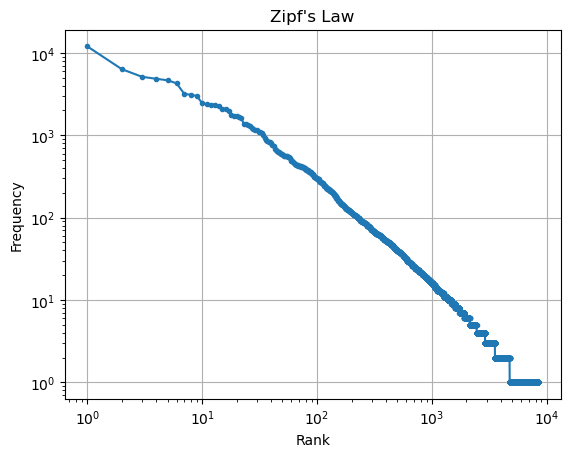

In [ ]:
zip_plot(emma_counter)

It should also work if you use bigrams or trigrams (pairs of words, or triples of words). `nltk` has relevant functions that you could use:

- `nltk.bigrams`

- `nltk.trigrams`

- `nltk.ngrams`


log_frequencies = -0.735890418561415 * log_rank + 3.396537080850991


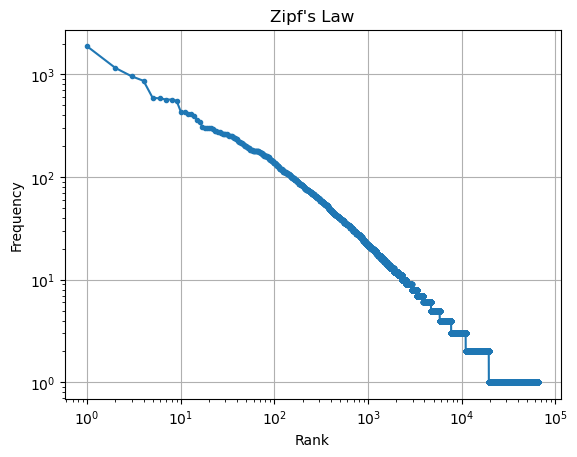

In [ ]:
zip_plot(collections.Counter(nltk.bigrams(emma_words)))

log_frequencies = -0.36501294263350526 * log_rank + 1.7807950153996421


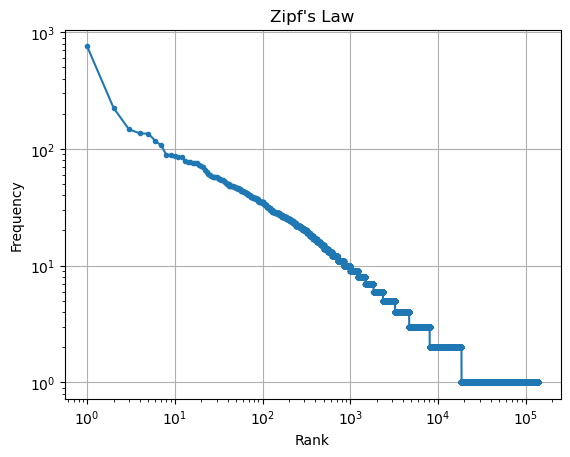

In [ ]:
zip_plot(collections.Counter(nltk.trigrams(emma_words)))

log_frequencies = -0.15063411380815078 * log_rank + 0.7435359256338085


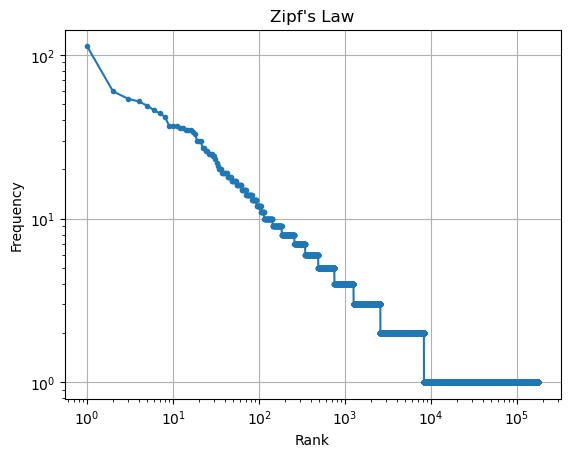

In [ ]:
zip_plot(collections.Counter(nltk.ngrams(emma_words, 4)))

## Chollet's Guidance

Let's pretend that every sentence in your document is going to be labelled in some way. (e.g. positive or negative sentiment; easy or hard to translate; or something like that).

We'd like to know what sort of architecture our deep learning model should have, and what sort of embeddings we should use.

- Split the document up into sentences (`nltk.sent_tokenize` is useful for this)

- How many sentences do you have?

- How many words do you have on average per sentence?

In [ ]:
sentences = nltk.sent_tokenize(emma)
print(f"Number of sentences: {len(sentences)}")
words_per_sentence = len(emma_words)/len(sentences)
print(f"Average words per sentence: {words_per_sentence}")

Number of sentences: 7456
Average words per sentence: 25.721030042918454


Based on https://developers.google.com/machine-learning/guides/text-classification/step-2-5#algorithm_for_data_preparation_and_model_building what would you choose?

(In reality, you might choose to do something different anyway, but it's a good starting point.)

In [ ]:
print(f"Chollet ratio: {len(sentences)/words_per_sentence}")

Chollet ratio: 289.87952611379944


A bag-of-words + tfidf or other simple multi-layer perceptron will work quite well.